# Анализ "Что определяет успешность компьютерных игр?"

### Краткое описание проекта:  
Есть данные из открытых источников по продаже компьютерных игр, оценки пользователей и экспертов, жанры и платформы. На основе этих данных требуется выявить закономерности определяющие успешность игр.

## Оглавление
* [Загрузка и предобработка данных](#first-bullet)
* [Анализ данных](#second-bullet)
* [Портрет пользователя](#third-bullet)
* [Проверка гипотез](#fourth-bullet)
* [Общий вывод](#fifth-bullet)

In [515]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import datetime
import warnings
warnings.filterwarnings('ignore')

In [516]:
pd.options.display.float_format = '{:.3f}'.format #форматируем вывод данных float на экран

In [517]:
data = pd.read_csv('/datasets/games.csv')

In [518]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


In [519]:
# проверяем долю пустых значений в каждом столбце
data.isna().sum()/ data.shape[0] * 100

Name               0.012
Platform           0.000
Year_of_Release    1.609
Genre              0.012
NA_sales           0.000
EU_sales           0.000
JP_sales           0.000
Other_sales        0.000
Critic_Score      51.319
User_Score        40.090
Rating            40.479
dtype: float64

In [520]:
# приводим названия столбцов к нижнему регистру
data.columns = [col.lower() for col in data.columns]

In [521]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [523]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,nan,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,nan,NaN,NaN


Для Sega Genesis  в 1993 году было выпущенно 172 игры согласно данным Википедии. Поскольку кроме года выпуска и платформы ничего не известно заполнить название игр в таблице проблематично. Поскольку платформа GEN достаточно старая (продажи прекращены в 1999 году), то для данного анализа игры выпущенные на данной платформе не важны для анализа, удалим данные две строки.

In [524]:
data.dropna(subset=['name'], inplace=True)

In [525]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Платформа DS появилась в 2004 года, игру с датой релиза 1985 год целесообразно удалить.

In [526]:
data[(data['platform'] == 'DS')].sort_values('year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.000,Action,0.000,0.000,0.020,0.000,nan,NaN,NaN
13463,Cocoto Kart Racer,DS,2004.000,Racing,0.040,0.000,0.000,0.000,nan,tbd,E
11517,Kenshuui Tendo Dokuta,DS,2004.000,Simulation,0.000,0.000,0.080,0.000,nan,NaN,NaN
4421,The Urbz: Sims in the City (all regions sales),DS,2004.000,Simulation,0.400,0.010,0.020,0.000,nan,NaN,NaN
7902,Daigasso! Band Brothers,DS,2004.000,Misc,0.000,0.000,0.190,0.000,nan,NaN,NaN


In [527]:
data = data.drop([15957])

Обработка пропусков в столбце `year_of_release`

In [528]:
len(data[data['year_of_release'].isna()])

269

In [529]:
#h = data.groupby('name')['platform'].count().to_frame().reset_index().sort_values('platform', ascending=False)
#h = h[h['platform'] > 3]
#h

In [530]:
#data[data['name'] == 'LEGO Marvel Super Heroes']

In [531]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.570,1.020,0.000,0.410,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.360,0.140,0.000,0.030,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,nan,Sports,0.010,0.000,0.000,0.000,43.000,tbd,E10+
16405,Freaky Flyers,GC,nan,Racing,0.010,0.000,0.000,0.000,69.000,6.5,T
16448,Inversion,PC,nan,Shooter,0.010,0.000,0.000,0.000,59.000,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,nan,Adventure,0.010,0.000,0.000,0.000,nan,NaN,NaN


Поскольку игры как правило выпускаются одновременно на нескольких платформах, то для кроссплатформенных игр пропуски можно заменить на дату выпуска игры для другой платформы. При этом существует определенный риск искажения данных связанный с тем, что игры могли перевыпускаться спустя какое то время на новой игровой платформе. С целью минимизации риска искажения данных будем сравнивать подтягиваемый год релиза с датой выпуска первой и последней игры на платформе, если дата релиза игры будет выходить за данный диапазон, то такое значение использовать для замены не будем.


In [532]:
data['min_year'] = 1
data['max_year'] = 1

In [533]:
for p, df in data.groupby('platform'):
    data.loc[data['platform'] == p, 'min_year'] = df['year_of_release'].min()
    data.loc[data['platform'] == p, 'max_year'] = df['year_of_release'].max()

In [534]:
# дата первого релиза игры
f = data[data['year_of_release'].notna()].pivot_table(index='name',values='year_of_release',aggfunc='min').reset_index()

In [535]:
for i in data[data['year_of_release'].isna()]['name'].unique():
    data.loc[(data['year_of_release'].isna()) & (data['name'] == i), 'year_of_release'] = f[f['name'] == i]['year_of_release'].mean()

In [536]:
# проверяем условие, что проведенная замена пропуска даты релиза на значение 
#попадает в интервал между датой выпуска первой игры на платформе и датой выпуска последней
y = (data['year_of_release'] <= data['max_year']) & (data['year_of_release'] >= data['min_year'])
data['year_of_release'] = data['year_of_release'].where(y, np.nan)

In [537]:
len(data[data['year_of_release'].isna()])

153

In [538]:
# повторяем тоже самое для самого позднего релиза игры
f = data[data['year_of_release'].notna()].pivot_table(index='name',values='year_of_release',aggfunc='max').reset_index()
for i in data[data['year_of_release'].isna()]['name'].unique():
    data.loc[(data['year_of_release'].isna()) & (data['name'] == i), 'year_of_release'] = f[f['name'] == i]['year_of_release'].mean()
y = (data['year_of_release'] <= data['max_year']) & (data['year_of_release'] >= data['min_year'])
data['year_of_release'] = data['year_of_release'].where(y, np.nan)

In [539]:
len(data[data['year_of_release'].isna()])

151

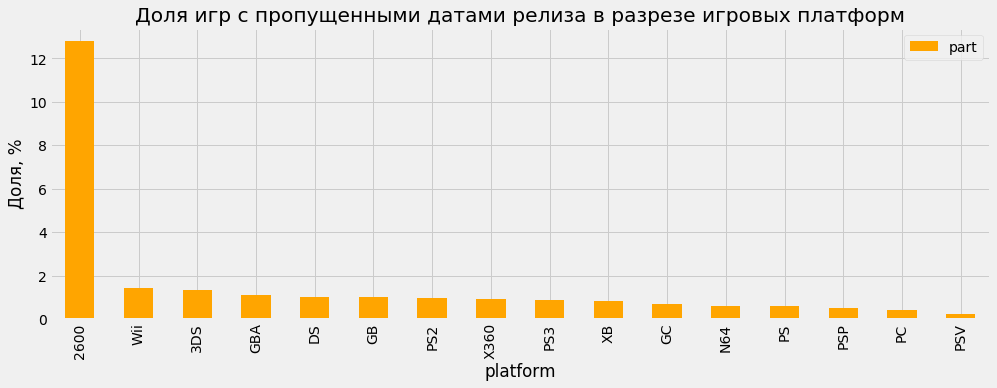

In [540]:
# Проверяем на каких платформах больше всего пропусков дат релизов
d=[]
for i in data['platform'].unique():
    a = len(data[(data['platform'] == i) & (data['year_of_release'].isna())]) / len(data[data['platform'] == i]) * 100
    d.append([i,a])
b = pd.DataFrame(d,columns=['platform','part']).sort_values(by='part', ascending=False).head(16)
b.plot(kind='bar', x='platform', figsize=(15,5), \
       title='Доля игр с пропущенными датами релиза в разрезе игровых платформ', color='orange')
plt.ylabel('Доля, %')
plt.show()

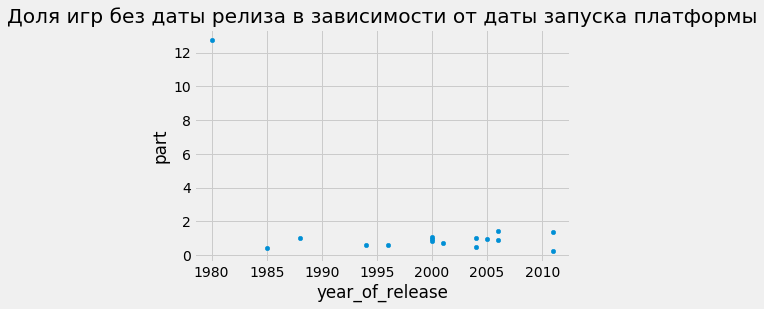

In [541]:
c = data.groupby('platform')['year_of_release'].min().reset_index()
b = b.merge(c, on='platform', how='left')
b.plot(kind='scatter', x='year_of_release', y='part');
plt.title('Доля игр без даты релиза в зависимости от даты запуска платформы');

Пропусков достаточно много, встречаются они преимущественно на старых платформах (самая свежая платформа в списке 2011 года), ручное заполнение слишком трудоемко. Заполним пропуски для кроссплатформенных игр и игр для ПК (не смотря на то, что первые игры для ПК были выпущены в 1980-х годах, платформа остается одной из наиболее популярных и на сегодняшний день).

In [542]:
data[data['year_of_release'].isna()]['name'].value_counts().head(12)

Rock Band                                4
Test Drive Unlimited 2                   3
Port Royale 3                            2
All-Star Baseball 2005                   2
Backbreaker                              2
Robert Ludlum's The Bourne Conspiracy    2
Silent Hill: Homecoming                  2
Virtua Quest                             2
Combat Elite: WWII Paratroopers          2
The Daring Game for Girls                2
WarioWare: Twisted!                      1
Sega Rally 2006                          1
Name: name, dtype: int64

In [543]:
data[(data['platform'] == 'PC') & (data['year_of_release'].isna())]['name']

4648                                TERA
7735              Test Drive Unlimited 2
13672                  Clockwork Empires
16277    Homeworld Remastered Collection
Name: name, dtype: object

In [544]:
d = {
                'Rock Band':'2007',
                "Robert Ludlum's The Bourne Conspiracy":'2008',
                'Backbreaker':'2009',
                'Combat Elite: WWII Paratroopers':'2005',
                'Test Drive Unlimited 2':'2011',
                'All-Star Baseball 2005':'2004',
                'Port Royale 3':'2012',
                'Silent Hill: Homecoming':'2008',
                'Virtua Quest':'2004',
                'The Daring Game for Girls':'2010',
                'TERA':'2011',
                'Test Drive Unlimited 2':'2011',
                'Clockwork Empires':'2014',
                'Homeworld Remastered Collection':'2015'
            }

In [545]:
for j in d.keys():
    data.loc[(data['year_of_release'].isna()) & (data['name'] == j), 'year_of_release'] = d[j]

In [546]:
len(data[data['year_of_release'].isna()])

125

In [547]:
# Заполняем медианой оставшиеся пропуски в столбце с датой релиза
for i in data[data['year_of_release'].isna()]['platform'].unique():
    data.loc[(data['year_of_release'].isna()) & (data['platform'] == i), 'year_of_release'] = \
    round(data[data['platform'] == i]['year_of_release'].median(),0)

In [548]:
# Преобразовываем тип данных к целоцисленному
data['year_of_release'] = data['year_of_release'].astype('int')

In [549]:
data['year_of_release'].dtype

dtype('int64')

In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 13 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16712 non-null int64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
min_year           16712 non-null float64
max_year           16712 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


In [552]:
data['user_score'].value_counts().head()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

В столбце `user_score` помимо цифровых данных присутсвует значение `tbd`, что обозначает To be determined ("будет определено позже"). Данная абривиатура не несет для нас в рамках данного анализа никой информационной нагрузки, заменим эти значения на NAN и приобразуем тип данных из object в float


In [553]:
# Проверяем сколько должно остаться значений в столбце "user_score"
10014 - 2424

7590

In [554]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 13 columns):
name               16712 non-null object
platform           16712 non-null object
year_of_release    16712 non-null int64
genre              16712 non-null object
na_sales           16712 non-null float64
eu_sales           16712 non-null float64
jp_sales           16712 non-null float64
other_sales        16712 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
min_year           16712 non-null float64
max_year           16712 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


In [555]:
data[['critic_score','user_score']].describe()

,critic_score,user_score
count,8137.000,7590.000
mean,68.968,7.125
std,13.938,1.500
min,13.000,0.000
25%,60.000,6.400
50%,71.000,7.500
75%,79.000,8.200
max,98.000,9.700


In [556]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Поскольку у одной игры выпущенной в одном и том же году на разных платформах рейтинг должен быть одинаковым, то проведем замену пропусков в столбце `rating` для кроссплатформенный игр на рейтинг этой же игры этого же года выпуска для другой платформы

In [557]:
for p, df in data[data['rating'].notna()].groupby(['name','year_of_release']):
    data.loc[((data['rating'].isna()) & (data['name'] == p[0]) & (data['year_of_release'] == p[1])), 'rating'] \
    = df[df['rating'].notna()]['rating'].min()

In [558]:
data['rating'].value_counts()

E       4085
T       3022
M       1598
E10+    1450
EC        10
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

В анализируемом датафрейме используется рейтинговая система США ESRB. Система была основана в 1994 году, поэтому более ранние игры могут не иметь рейтинга ESRB. Кроме того, данный рейтинг применяетя преимущественно на территории США и Канады. На территории ЕС используется рейтинг PEGI, на территории Японии рейтинг CERO.

Поскольку рейтинг K-A (использовался до 1997 года) равносилен рейтингу E, то заменим K-A на E.

In [559]:
data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E'

In [560]:
data[data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,min_year,max_year
13672,Clockwork Empires,PC,2014,Strategy,0.000,0.040,0.000,0.000,58.000,3.800,RP,1985.000,2016.000
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.000,0.030,0.000,0.010,63.000,6.800,RP,1985.000,2016.000
16180,WRC: FIA World Rally Championship,PC,2005,Racing,0.000,0.010,0.000,0.000,65.000,nan,RP,1985.000,2016.000


Поскольку RP означает «Rating Pending» - «Рейтинг ожидается», у данных игр рейтинг до сих пор не присвоен. Заменим данный рейтинг на Nan

In [561]:
data.loc[(data['rating'] == 'RP'), 'rating'] = np.nan

In [562]:
data[data['rating'] == 'AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,min_year,max_year
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.260,0.610,0.000,0.090,93.000,8.600,AO,2000.000,2008.000


При перееиздании рейтинг игры `Grand Theft Auto: San Andreas` был заменен на M, проведем такую же замену в датафрейме

In [563]:
data.loc[(data['rating'] == 'AO'), 'rating'] = 'M'

In [564]:
data[data['rating'] == 'EC'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,min_year,max_year
4297,Nickelodeon Team Umizoomi,DS,2011,Action,0.420,0.000,0.000,0.030,nan,nan,EC,2004.000,2013.000
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,0.350,0.000,0.000,0.020,nan,nan,EC,2006.000,2016.000
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,0.270,0.000,0.000,0.020,nan,nan,EC,2006.000,2016.000
6157,Sesame Street: Elmo's A-to-Zoo Adventure,DS,2010,Misc,0.260,0.000,0.000,0.020,nan,nan,EC,2004.000,2013.000
6417,Sesame Street: Cookie's Counting Carnival,DS,2010,Misc,0.250,0.000,0.000,0.020,nan,nan,EC,2004.000,2013.000


У игр с рейтингом EC (дети от 3 лет) нет явной привязки к какой либо платформе или году выпуска, присоединим данный рейтинг к наиболее близкому к нему по смыслу рейтингу E (дети от 6 лет)

In [565]:
data.loc[(data['rating'] == 'EC'), 'rating'] = 'E'

In [566]:
data['rating'].value_counts()

E       4098
T       3022
M       1599
E10+    1450
Name: rating, dtype: int64

In [567]:
# создаем столбец с сумарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Общий вывод
Таблица состоит из более чем 16000 строк, содержит информацию о названии игр, игровых платформах на которых они выходили, год выпуска, результаты продаж и рейтинги критиков, пользователей и рейтинг ESRB.  
Данные с пропусками в годах выпуска были заполнены в несколько этапов:  
  - на основе дат выпуска этой же игры на других платформах
  - на основе данных из открытых источников
  - на основе медианных значений для каждой игровой платформы  
  
Типы данных преобразованы (год релиза приведен к целочисленному значению, рейтинг пользователей из строки приведен к числовому типу).


## Анализ данных <a class="anchor" id="second-bullet"></a>

Построим распределение количества выпущенных игр по годам

In [568]:
plt.style.use('fivethirtyeight')

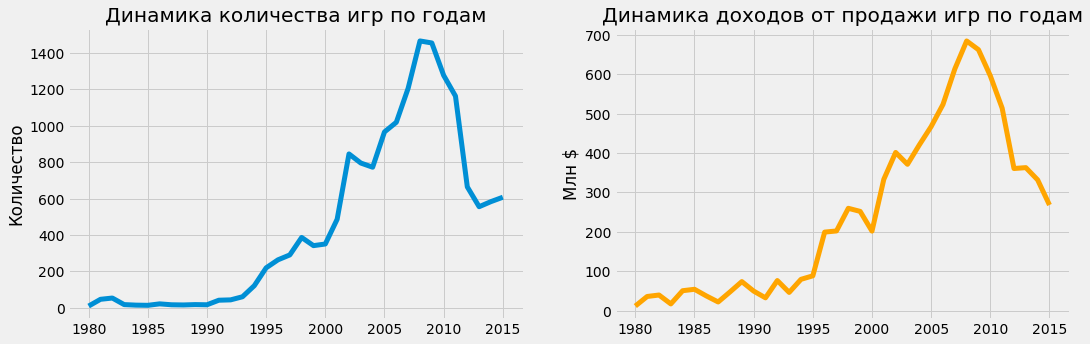

In [569]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax1.plot(data[data['year_of_release'] < 2016].pivot_table(index='year_of_release', values='name', aggfunc='count'),linewidth=5)
ax1.set_title('Динамика количества игр по годам')
ax1.set_ylabel('Количество')
ax2.plot(data[data['year_of_release'] < 2016].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'),linewidth=5, color='orange')
ax2.set_title('Динамика доходов от продажи игр по годам')
ax2.set_ylabel('Млн $')
plt.show()
# убираем данные за 2016 год поскольку по условиям кейса данные за 2016 год неполные

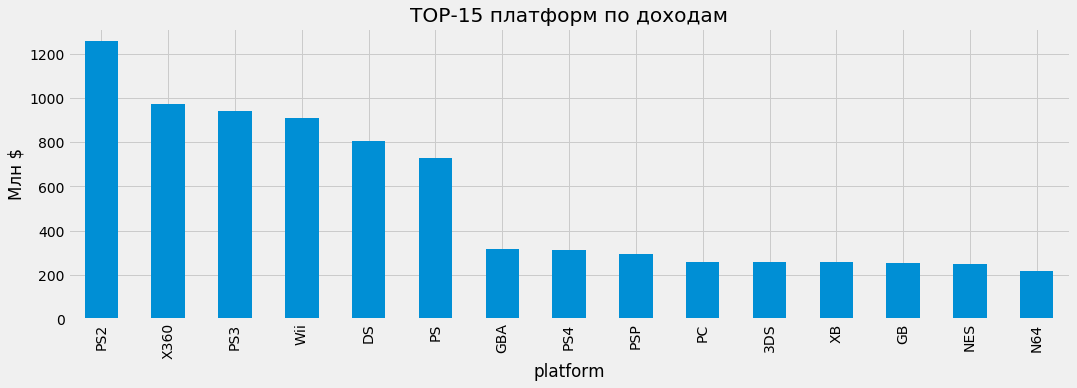

In [570]:
data.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).head(15) \
    .plot(kind='bar',figsize=(16,5), legend=False);
plt.title('ТОР-15 платформ по доходам');
plt.ylabel('Млн $');

Очевидными лидерами являются первые 6 игровых платформ. При это все эти платформы существуют достаточно давно и по состоянию на конец 2016 года больше не выпускаются. Посмотрим более подробно информацию по данным платформам.

In [571]:
top6 = data.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).head(6)
top6

,total_sales
platform,
PS2,1255.770
X360,971.420
PS3,939.650
Wii,907.510
DS,806.100
PS,730.860


In [572]:
b = data[data['platform'].isin(top6.index)] \
        .pivot_table(index='platform', values='year_of_release', aggfunc=['min','max','median']) \
        .sort_values([('min','year_of_release')]).reset_index()
b['life_cycle'] = b['max'] - b['min']
b

,platform,min,max,median,life_cycle
,,year_of_release,year_of_release,year_of_release,
0,PS,1994,2003,1998,9
1,PS2,2000,2011,2005,11
2,DS,2004,2013,2008,9
3,X360,2005,2016,2010,11
4,PS3,2006,2016,2011,10
5,Wii,2006,2016,2009,10


In [573]:
b['life_cycle'].describe()

count    6.000
mean    10.000
std      0.894
min      9.000
25%      9.250
50%     10.000
75%     10.750
max     11.000
Name: life_cycle, dtype: float64

Таким образом средний срок жизни для популярных игровых платформ составляет $около 10 лет$.
При этом на протяжении этого срока согласно концепции жизненного цикла платформы генерируют различное количество доходов. 
Посмотрим как выглядит распределение доходов по годам с момента старта платформы до момента ее официального закрытия.

Исключим из анализа платформу PS. Платформа достаточно старая, появилась в середине 90-х годов. При этом ее срок жизни практически не захватывает пиковый период продаж компьютерных игр (продажи остановлены в 2003 году).

In [574]:
top5 = top6.head()
top5

,total_sales
platform,
PS2,1255.770
X360,971.420
PS3,939.650
Wii,907.510
DS,806.100


In [575]:
data['year_of_start'] = data['year_of_release'] - data['min_year'] + 1
data_top = data[data['platform'].isin(top5.index)]

In [576]:
a = data_top.pivot_table(index='year_of_start', aggfunc={'total_sales':'sum','platform':'nunique'}).reset_index().head(10)
a['sales_to_platform'] = a['total_sales'] / a['platform']
a

,year_of_start,platform,total_sales,sales_to_platform
0,1.000,5,227.290,45.458
1,2.000,5,578.670,115.734
2,3.000,5,723.280,144.656
3,4.000,5,817.300,163.460
4,5.000,5,751.960,150.392
5,6.000,5,678.510,135.702
6,7.000,5,466.660,93.332
7,8.000,5,326.180,65.236
8,9.000,5,205.660,41.132
9,10.000,5,80.640,16.128


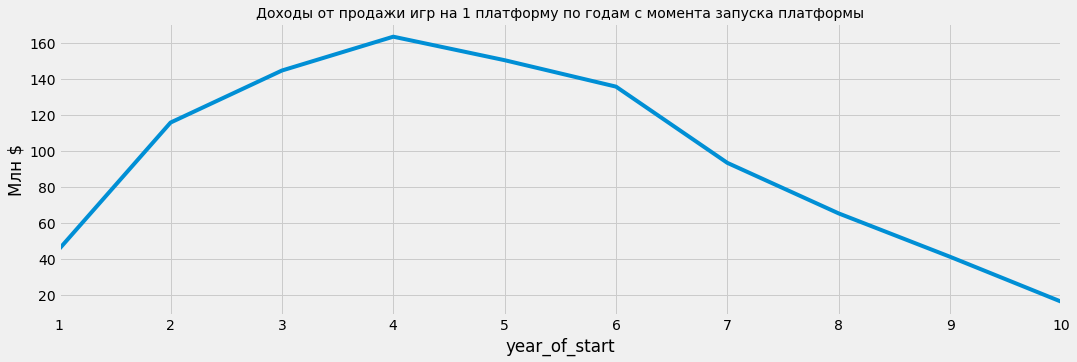

In [577]:
a[['year_of_start','sales_to_platform']].plot(x='year_of_start', figsize=(16,5), legend=False);
plt.title('Доходы от продажи игр на 1 платформу по годам с момента запуска платформы',fontsize=14);
plt.ylabel('Млн $');

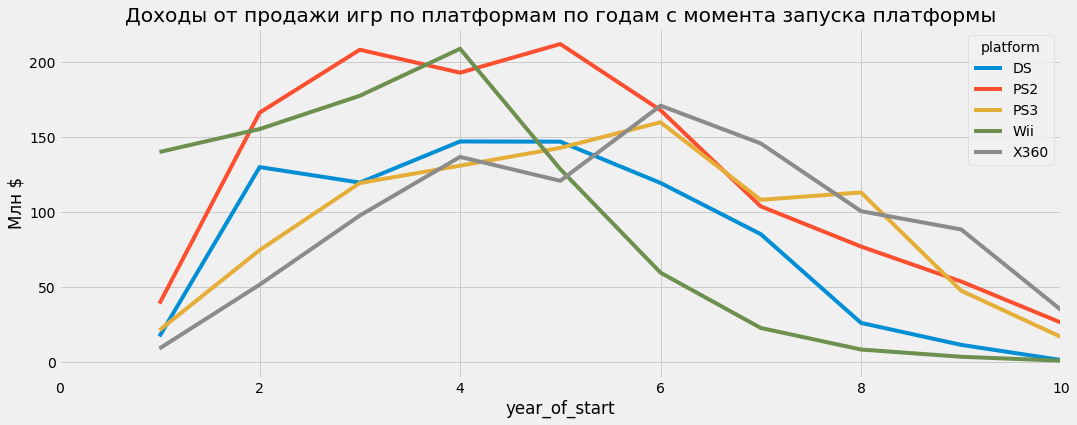

In [578]:
data_top.pivot_table(index='year_of_start', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,6), legend=True)
plt.title('Доходы от продажи игр по платформам по годам с момента запуска платформы')
plt.ylabel('Млн $')
plt.xlim(0,10)
plt.show;

In [579]:
data_top.pivot_table(index='year_of_start', columns='platform', values='total_sales', aggfunc='sum')

platform,DS,PS2,PS3,Wii,X360
year_of_start,,,,,
1.000,17.270,39.170,21.440,140.190,9.220
2.000,130.140,166.430,74.810,155.500,51.790
3.000,119.810,208.360,119.550,177.680,97.880
4.000,147.230,193.050,131.100,208.980,136.940
5.000,147.080,212.150,142.960,128.770,121.000
6.000,119.560,168.060,160.010,59.790,171.090
7.000,85.470,103.990,108.350,22.940,145.910
8.000,26.330,77.220,113.250,8.590,100.790
9.000,11.670,53.900,47.760,3.750,88.580


Судя по графикам выше рост продаж наблюдает у популярных игровых платформ в течении первых 4-5 лет, после этого начинается постепенный продаж из-за перехода новых игр на более свежие платформы.

Выберем все актуальные платформы из нашей базы (платформы, на которых выходили игры в 2016 году) и посмотрим на какой стадии жизненного цикла они находятся в настоящий момент.

In [580]:
data[data['max_year'] == 2016] \
        .pivot_table(index='platform', values='year_of_release', aggfunc=['min','max','median']) \
        .sort_values([('min','year_of_release')]).reset_index()

,platform,min,max,median
,,year_of_release,year_of_release,year_of_release
0,PC,1985,2016,2010
1,X360,2005,2016,2010
2,PS3,2006,2016,2011
3,Wii,2006,2016,2009
4,3DS,2011,2016,2013
5,PSV,2011,2016,2014
6,WiiU,2012,2016,2013
7,PS4,2013,2016,2015
8,XOne,2013,2016,2015


Убираем из этого списка платформы, которые перестали поддерживаться в 2016 году и/или находятся в конце своего жизненного цикла (X360, PS3, Wii, PC).

In [581]:
data[(data['max_year'] == 2016) & (~data['platform'].isin(['X360','PS3','Wii','PC']))] \
        .pivot_table(index='platform', values='year_of_release', aggfunc=['min','max','median']) \
        .sort_values([('min','year_of_release')]).reset_index()

,platform,min,max,median
,,year_of_release,year_of_release,year_of_release
0,3DS,2011,2016,2013
1,PSV,2011,2016,2014
2,WiiU,2012,2016,2013
3,PS4,2013,2016,2015
4,XOne,2013,2016,2015


In [582]:
data_act = data[(data['max_year'] == 2016) & (~data['platform'].isin(['X360','PS3','Wii','PC']))]

In [583]:
data_act[data_act['year_of_release'] != 2016] \
        .pivot_table(index='year_of_start', columns='platform',values='total_sales',aggfunc='sum')

platform,3DS,PS4,PSV,WiiU,XOne
year_of_start,,,,,
1.000,63.200,25.990,4.630,17.560,18.960
2.000,51.760,100.000,16.190,21.650,54.070
3.000,57.360,118.900,10.590,22.030,60.140
4.000,43.760,nan,12.160,16.350,nan
5.000,27.780,nan,6.250,nan,nan


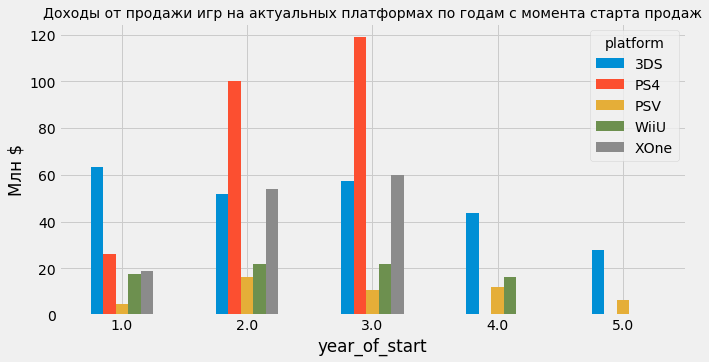

In [584]:
#данные за 2016 год не полные, исключаем их из анализа
data_act[data_act['year_of_release'] != 2016] \
        .pivot_table(index='year_of_start', columns='platform',values='total_sales',aggfunc='sum') \
        .plot(kind='bar', figsize=(10,5), rot=0);
plt.title('Доходы от продажи игр на актуальных платформах по годам с момента старта продаж',fontsize=14);
plt.ylabel('Млн $');

Таким образом единтсвенными растущими платформами в настоящий момент являются PS4 и XOne. Исходя из динамики предшественников можно предположить, что продажи на данных платформах в ближайшие 2-3 года будут только расти. Остальные платформы (3DS, PSV, WiiU)  перешли в завершающую стадию своего жизненного цикла, продажи по ним в ближайшие 2-3 года существенно сократятся.

Сравним как идут продажи на PS4 XOne  в сравнении с их предшественниками (PS3, X360 соответсвенно).

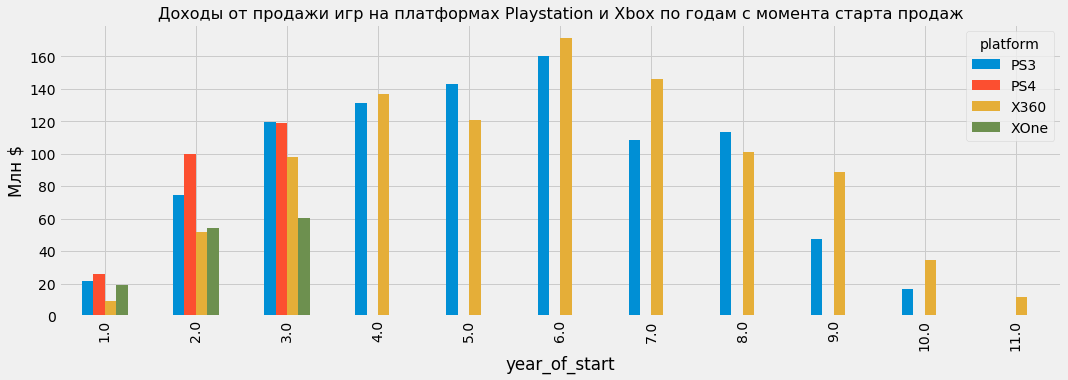

In [585]:
data[(data['year_of_release'] != 2016) & (data['platform'].isin(['PS3','PS4','X360','XOne']))] \
        .pivot_table(index='year_of_start', columns='platform',values='total_sales',aggfunc='sum') \
        .plot(kind='bar', figsize=(16,5));
plt.title('Доходы от продажи игр на платформах Playstation и Xbox по годам с момента старта продаж',fontsize=16);
plt.ylabel('Млн $');

In [586]:
z = data[(data['year_of_release'] != 2016) & (data['platform'].isin(['PS3','PS4','X360','XOne'])) & (data['year_of_start'] < 4)] \
        .pivot_table(index='year_of_start', columns='platform',values='total_sales',aggfunc='sum')
z['PS4/PS3'] = z['PS4'] / z['PS3']
z['XOne/X360'] = z['XOne'] / z['X360']
z

platform,PS3,PS4,X360,XOne,PS4/PS3,XOne/X360
year_of_start,,,,,,
1.000,21.440,25.990,9.220,18.960,1.212,2.056
2.000,74.810,100.000,51.790,54.070,1.337,1.044
3.000,119.550,118.900,97.880,60.140,0.995,0.614


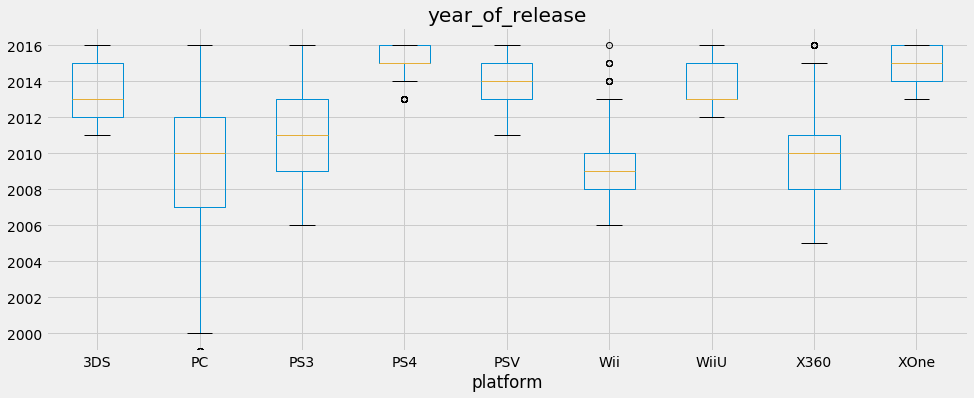

In [587]:
data[(data['max_year'] == 2016)].boxplot('year_of_release', by='platform',figsize=(16,6));
plt.ylim(1999,2017)
plt.suptitle('');

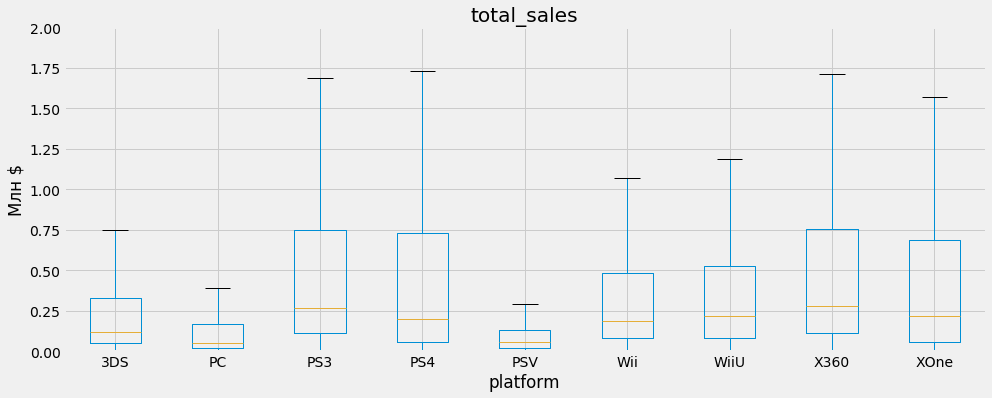

In [588]:
data[(data['max_year'] == 2016)].boxplot('total_sales', by='platform',figsize=(16,6), showfliers=False);
plt.ylim(0,2)
plt.ylabel('Млн $')
plt.suptitle('');

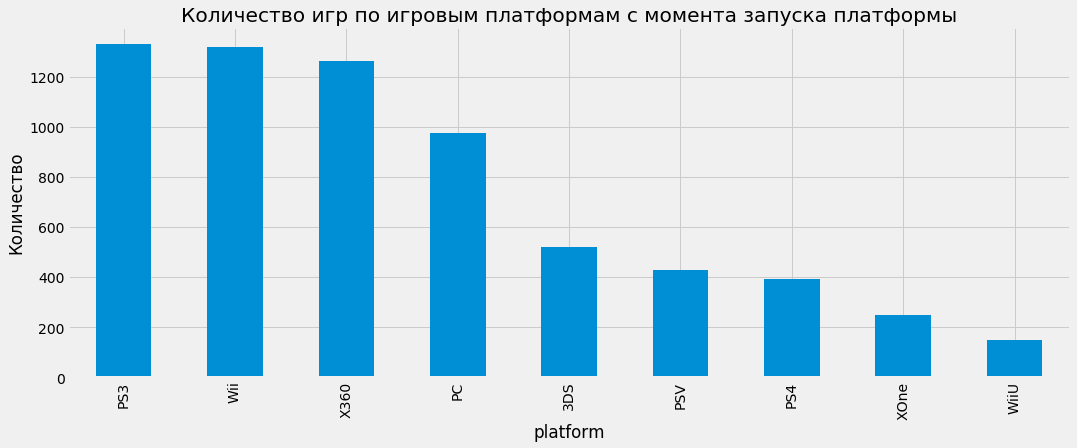

In [589]:
data[(data['max_year'] == 2016)].pivot_table(index='platform',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).plot(kind='bar',figsize=(16,6), legend=False);
plt.ylabel('Количество')
plt.title('Количество релизов игр по игровым платформам с момента запуска платформы');

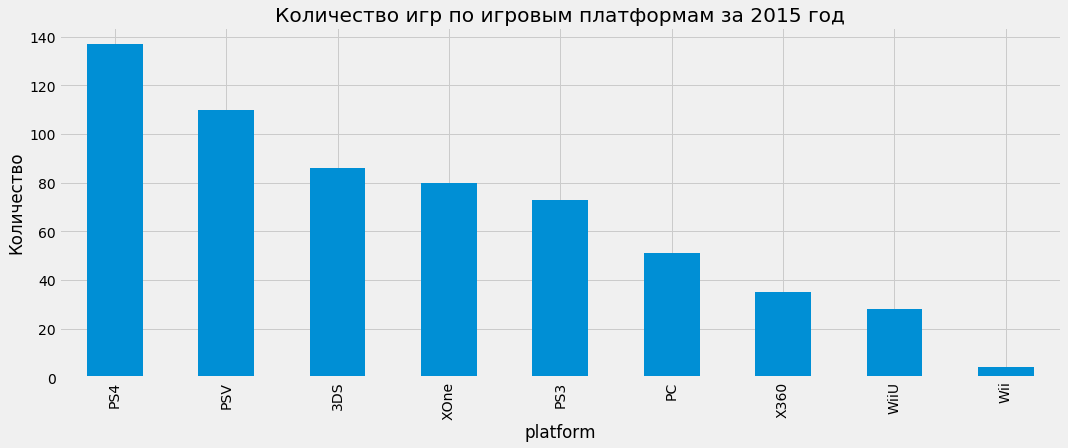

In [590]:
data[(data['max_year'] == 2016) & ((data['year_of_release'] == 2015))].pivot_table(index='platform',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).plot(kind='bar',figsize=(16,6), legend=False);
plt.ylabel('Количество')
plt.title('Количество релизов игр по игровым платформам за 2015 год');

В целом необходимо отметить, что на платформе Playstation выходит несколько больше игр чем на Xbox, при этом средняя доходность игр примерно одинаковая и сущесвенно выше среднего значения по рынку.

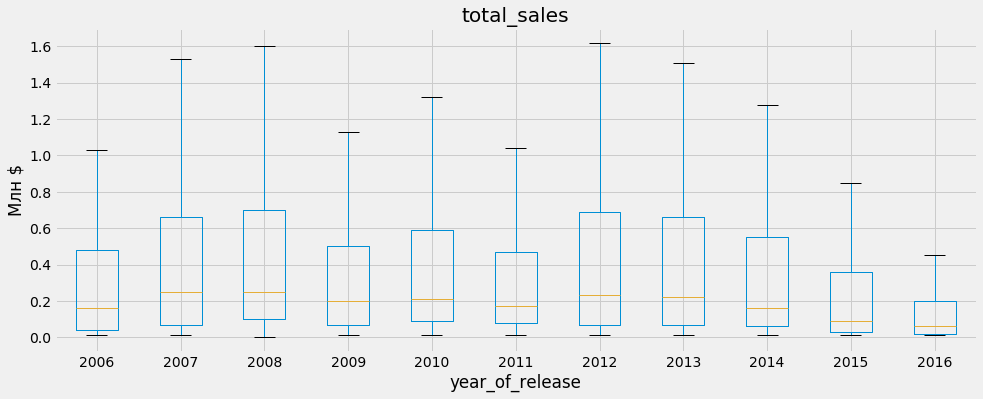

In [591]:
data[(data['max_year'] == 2016) & (data['year_of_release'] > 2005)].boxplot('total_sales', by='year_of_release',figsize=(16,6), showfliers=False);
#plt.ylim(0,2)
plt.ylabel('Млн $');
plt.suptitle('');

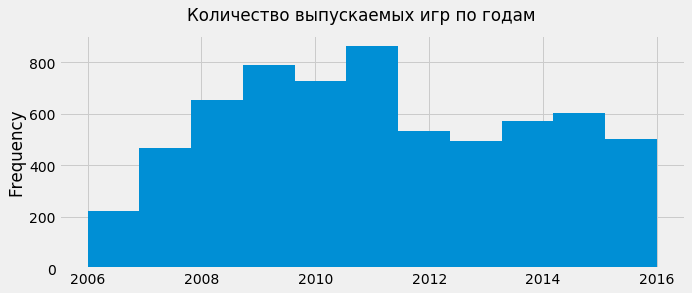

In [592]:
data[(data['max_year'] == 2016) & (data['year_of_release'] > 2005)] \
    .plot(kind='hist', y='year_of_release', figsize=(10,4), bins=11,legend=False);
plt.suptitle('Количество релизов игр по годам');

С 2012 года наблюдается сокращение количества выпускаемых игр, при этом средний доход на 1 игру также падает.


Проверим корелляцию между рейтингом игры и ее продажами

In [593]:
data[(data['max_year'] == 2016)]['total_sales'].corr(data[(data['max_year'] == 2016)]['critic_score'])

0.2217266729238577

In [594]:
data[(data['max_year'] == 2016)]['total_sales'].corr(data[(data['max_year'] == 2016)]['user_score'])

0.07371980123155922

In [595]:
data[(data['max_year'] == 2016)]['user_score'].corr(data[(data['max_year'] == 2016)]['critic_score'])

0.5973806895087607

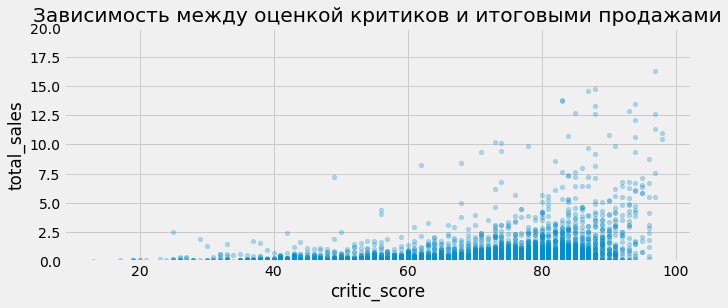

In [596]:
data[(data['max_year'] == 2016)].plot(kind='scatter', x='critic_score', y='total_sales',figsize=(10,4), alpha=0.3)
plt.title('Зависимость между оценкой критиков и итоговыми продажами')
plt.ylim(0,20)
plt.show;

In [597]:
data['critic_category'] = pd.cut(data['critic_score'],[0,20,30,40,50,60,70,80,90,100])

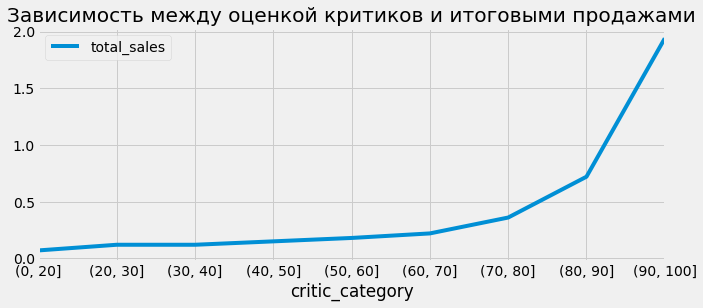

In [598]:
data[(data['max_year'] == 2016)].pivot_table(index='critic_category',values='total_sales', aggfunc='median') \
        .plot(figsize=(10,4))
plt.title('Зависимость между оценкой критиков и итоговыми продажами')
plt.show;

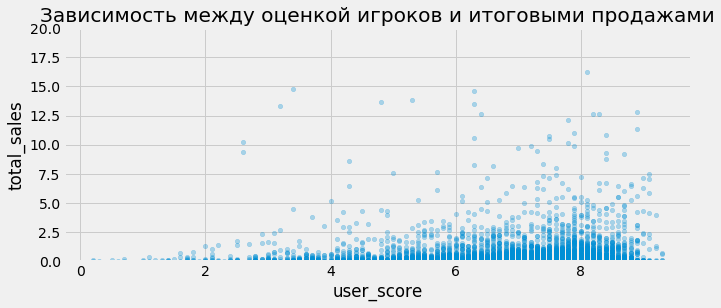

In [599]:
data[(data['max_year'] == 2016)].plot(kind='scatter', x='user_score', y='total_sales',figsize=(10,4), alpha=0.3)
plt.title('Зависимость между оценкой игроков и итоговыми продажами')
plt.ylim(0,20)
plt.show;

In [600]:
data['user_category'] = pd.cut(data['user_score'],[0,2,3,4,5,6,7,8,9,10])

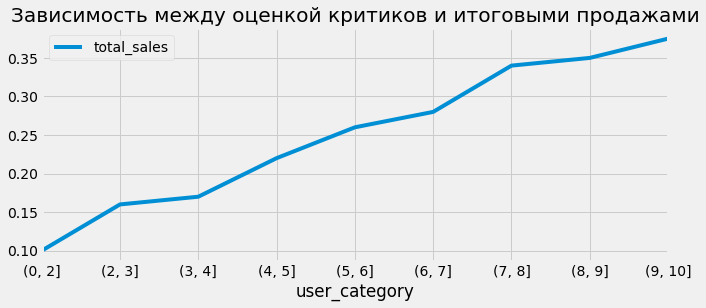

In [601]:
data[(data['max_year'] == 2016)].pivot_table(index='user_category',values='total_sales', aggfunc='median') \
        .plot(figsize=(10,4))
plt.title('Зависимость между оценкой игроков и итоговыми продажами')
plt.show;

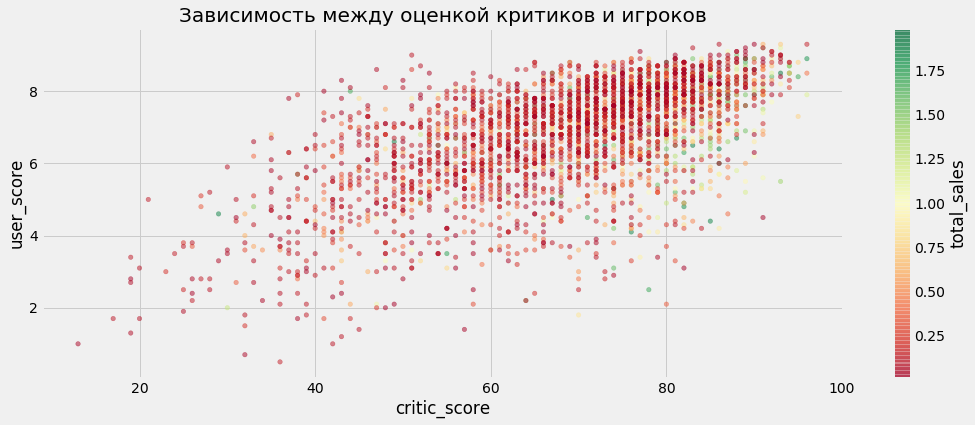

In [602]:
data[(data['max_year'] == 2016) & (data['total_sales'] < 2)].plot(kind='scatter', x='critic_score', y='user_score', c='total_sales', colormap='RdYlGn', figsize=(16,6), alpha=0.5)
plt.title('Зависимость между оценкой критиков и игроков')
plt.show;

Корреляция между продажами и оценками критиков низкая (0.22), то же самое можно сказать и про корреляцию между продажами и оценками игроков (0.07). При этом построение графиков по категориям оценок показало, что на сомом деле существует зависимость между оенками и итоговыми продажами, только такая зависимость начинает проявляться при оценке критиков выше 70 баллов и при оценке игроков выше 7 баллов. При этом между оценками критиков и игроков существует средняя корреляция 0.60. 

Платформа PS3:
Корреляция между оценкой критиков и продажами 0.43 на платформе 
Корреляция между оценкой игроков и продажами 0.13 на платформе 
Платформа PS4:
Корреляция между оценкой критиков и продажами 0.41 на платформе 
Корреляция между оценкой игроков и продажами -0.03 на платформе 
Платформа X360:
Корреляция между оценкой критиков и продажами 0.39 на платформе 
Корреляция между оценкой игроков и продажами 0.11 на платформе 
Платформа XOne:
Корреляция между оценкой критиков и продажами 0.42 на платформе 
Корреляция между оценкой игроков и продажами -0.07 на платформе 


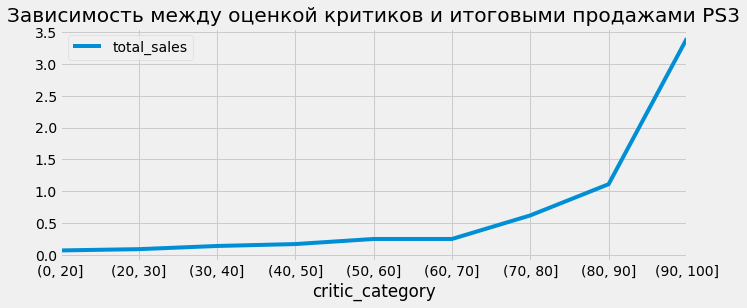

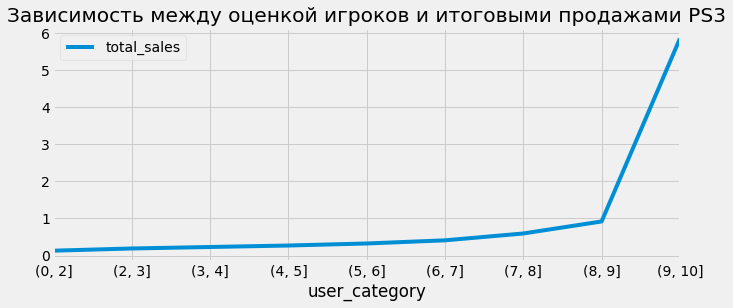

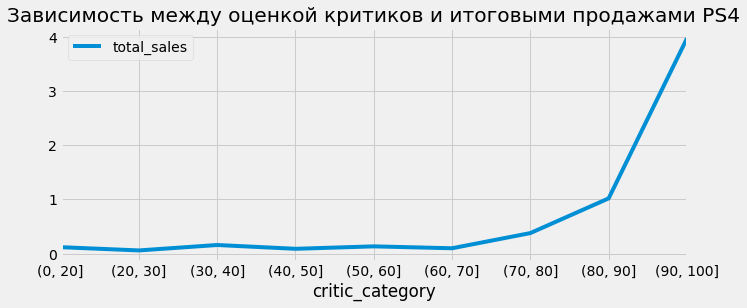

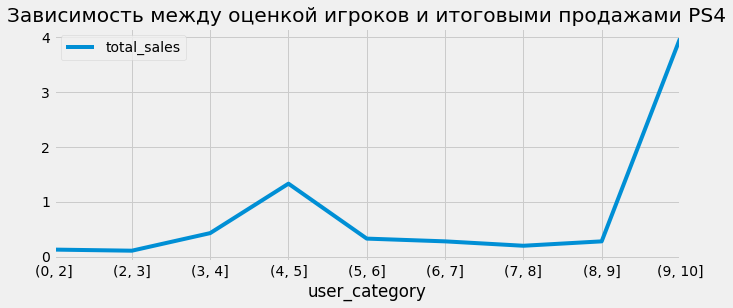

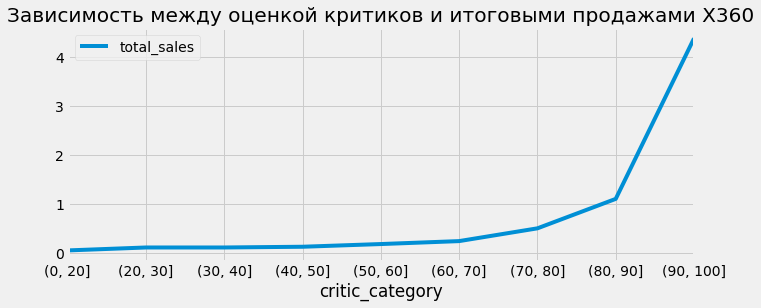

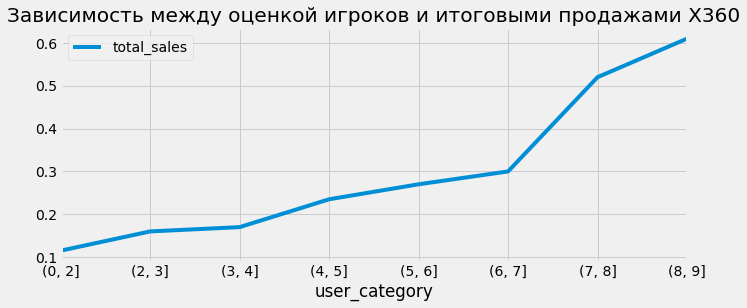

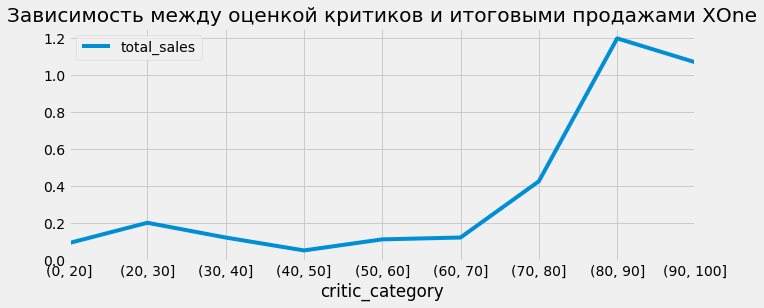

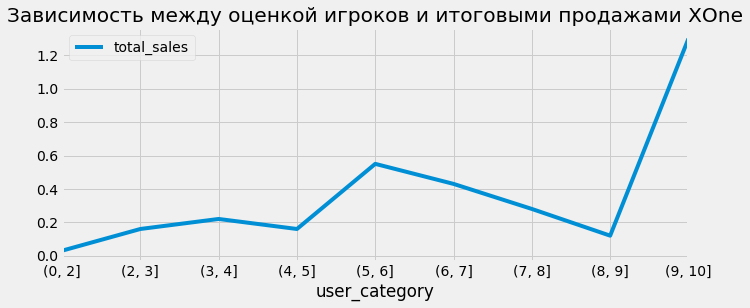

In [603]:
for i in ['PS3','PS4','X360','XOne']:
    data[(data['max_year'] == 2016) & (data['platform'] == i)].pivot_table(index='critic_category',values='total_sales', aggfunc='median') \
        .plot(figsize=(10,4))
    plt.title('Зависимость между оценкой критиков и итоговыми продажами ' + i)
    plt.show;
    k1 = data[(data['max_year'] == 2016) & (data['platform'] == i)]['total_sales'].corr(data[(data['max_year'] == 2016) & (data['platform'] == i)]['critic_score'])
    print('Платформа ' + i + ':')
    print('Корреляция между оценкой критиков и продажами {:.2f} на платформе '.format(k1))
    data[(data['max_year'] == 2016) & (data['platform'] == i)].pivot_table(index='user_category',values='total_sales', aggfunc='median') \
        .plot(figsize=(10,4))
    plt.title('Зависимость между оценкой игроков и итоговыми продажами ' + i)
    k2 = data[(data['max_year'] == 2016) & (data['platform'] == i)]['total_sales'].corr(data[(data['max_year'] == 2016) & (data['platform'] == i)]['user_score'])
    print('Корреляция между оценкой игроков и продажами {:.2f} на платформе '.format(k2))
    plt.show;

In [604]:
data[(data['max_year'] == 2016) & (data['platform'].isin(['PS3','PS4','X360','XOne'])) & (data['critic_score'] > 50)] \
        .pivot_table(index='critic_category',columns=['platform'],values='total_sales', aggfunc=['median','count'])

median                     count                      
platform           PS3   PS4  X360  XOne     PS3    PS4    X360   XOne
critic_category                                                       
(50, 60]         0.250 0.135 0.190 0.110 109.000 22.000 129.000 19.000
(60, 70]         0.250 0.100 0.250 0.120 169.000 53.000 189.000 27.000
(70, 80]         0.620 0.380 0.510 0.425 239.000 99.000 258.000 62.000
(80, 90]         1.110 1.020 1.110 1.200 185.000 57.000 184.000 47.000
(90, 100]        3.400 3.970 4.380 1.070  35.000  5.000  31.000  6.000

In [605]:
data[(data['max_year'] == 2016) & (data['platform'].isin(['PS3','PS4','X360','XOne'])) & (data['user_score'] > 5)] \
        .pivot_table(index='user_category',columns=['platform'],values='total_sales', aggfunc=['median','count'])

median                     count                      
platform         PS3   PS4  X360  XOne     PS3    PS4    X360   XOne
user_category                                                       
(5, 6]         0.325 0.330 0.270 0.550  98.000 27.000 144.000 39.000
(6, 7]         0.410 0.280 0.300 0.430 201.000 72.000 226.000 52.000
(7, 8]         0.595 0.200 0.520 0.280 320.000 87.000 323.000 50.000
(8, 9]         0.920 0.280 0.610 0.120 135.000 40.000 148.000 20.000
(9, 10]        5.860 3.970   nan 1.300   1.000  1.000     nan  1.000

В разрезе платформ Playstation и Xbox ситуации похожие. По играм с оценкой выше 80 баллов наблюдается увеличение средних доходов в расчете на 1 игру. По рейтигу игроков наиболее доходными были игры с рейтингом выше 9.

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Анализ корреляции выполнен отлично, все верно рассчитано и отображено. Только стоило вместо рассчета отдельных корреляций посчитать матрицу корреляций. Она поможет как сравнить корреляции дохода сразу с обеими оценками, а также корреляцию оценок между собой.

Оценим как влияет жанр игры на итоговые продажи

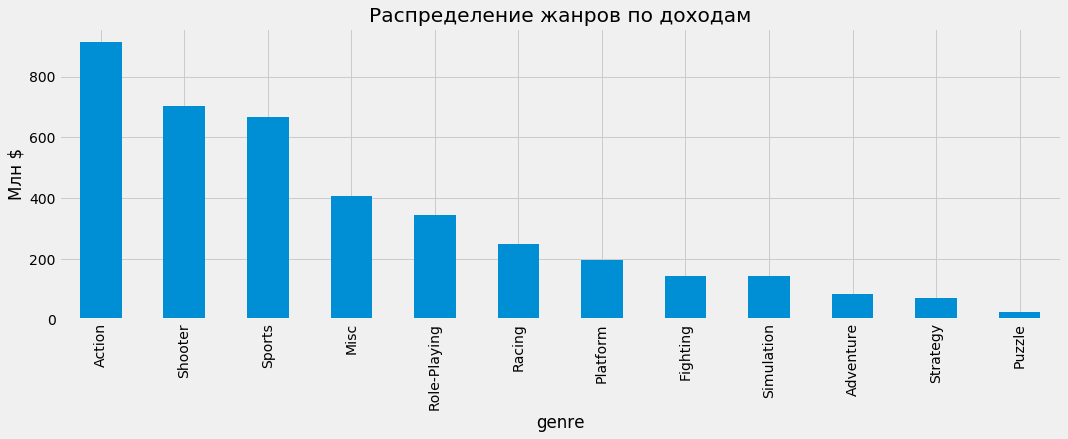

In [606]:
data[(data['max_year'] == 2016)].pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False) \
    .plot(kind='bar',figsize=(16,5), legend=False);
plt.title('Распределение жанров по доходам');
plt.ylabel('Млн $');

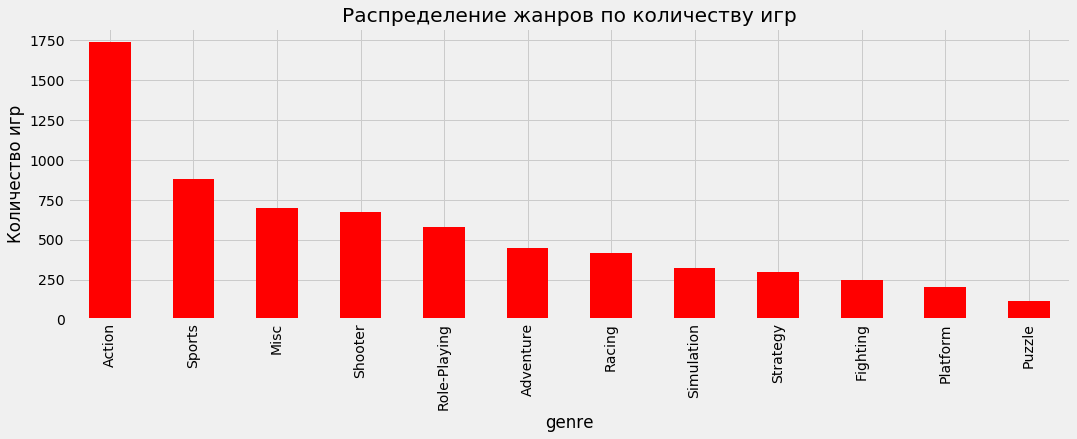

In [607]:
data[(data['max_year'] == 2016)].pivot_table(index='genre',values='platform',aggfunc='count').sort_values('platform',ascending=False) \
    .plot(kind='bar',figsize=(16,5), legend=False, color='r');
plt.title('Распределение жанров по количеству игр');
plt.ylabel('Количество игр');

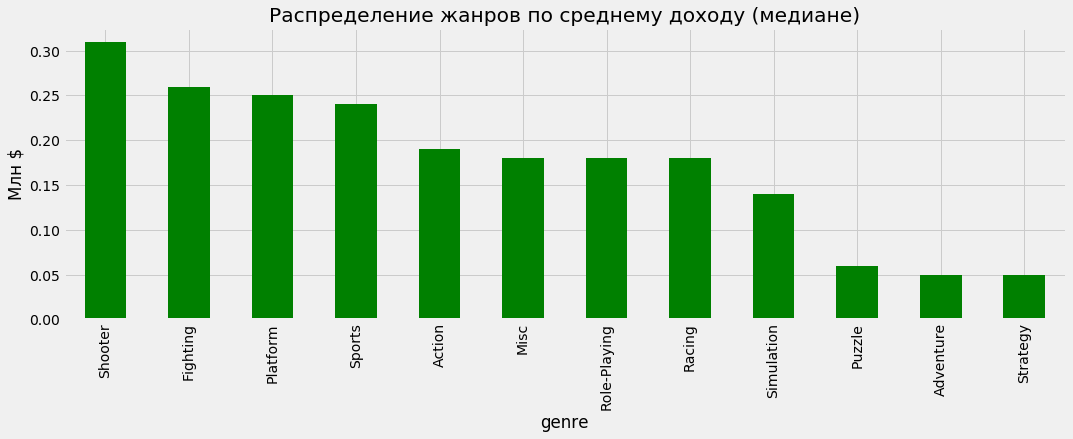

In [608]:
data[(data['max_year'] == 2016)].pivot_table(index='genre',values='total_sales',aggfunc='median').sort_values('total_sales',ascending=False) \
    .plot(kind='bar',figsize=(16,5), legend=False, color='g');
plt.title('Распределение жанров по среднему доходу (медиане)');
plt.ylabel('Млн $');

Наибольший доход приносят игры из жанров Action и Shooter, при этом наибольший доход в расчете на одну игру приносят Shooter и Fighting

In [609]:
data[(data['max_year'] == 2016) & (data['platform'].isin(['PS3','PS4','X360','XOne']))] \
        .pivot_table(index='genre',columns='platform',values='total_sales',aggfunc=['sum','count','median']) 

sum                         count                         \
platform         PS3    PS4    X360   XOne     PS3     PS4    X360   XOne   
genre                                                                       
Action       301.590 96.100 239.650 37.310 380.000 144.000 323.000 85.000   
Adventure     22.310  6.340  14.890  2.680  74.000  28.000  48.000 14.000   
Fighting      51.110  8.650  37.320  2.450  76.000  18.000  65.000  7.000   
Misc          46.860  8.190  91.570  7.430 125.000  20.000 127.000 19.000   
Platform      29.800  7.690  11.290  0.930  37.000  12.000  25.000  5.000   
Puzzle         0.590  0.020   0.870    nan   3.000   1.000   7.000    nan   
Racing        72.130 12.140  64.980  9.790  92.000  19.000 104.000 20.000   
Role-Playing  73.710 28.990  71.390 10.550 119.000  51.000  75.000 14.000   
Shooter      192.540 88.560 276.920 60.330 156.000  41.000 203.000 38.000   
Simulation    10.380  1.230  14.190  0.690  31.000   6.000  40.000  4.000   
Sports       133.780 55.610 138.340 26.740 214.000  46.000 217.000 38.000   
Strategy       4.850  0.620  10.010  0.420  24.000   6.000  28.000  3.000   

             median                    
platform        PS3   PS4  X360  XOne  
genre                                  
Action        0.305 0.155 0.290 0.150  
Adventure     0.060 0.070 0.060 0.060  
Fighting      0.465 0.170 0.350 0.200  
Misc          0.160 0.075 0.210 0.180  
Platform      0.480 0.300 0.280 0.160  
Puzzle        0.150 0.020 0.110   nan  
Racing        0.305 0.230 0.250 0.185  
Role-Playing  0.230 0.200 0.340 0.320  
Shooter       0.540 0.970 0.390 1.095  
Simulation    0.190 0.210 0.185 0.160  
Sports        0.270 0.525 0.310 0.335  
Strategy      0.110 0.080 0.250 0.170

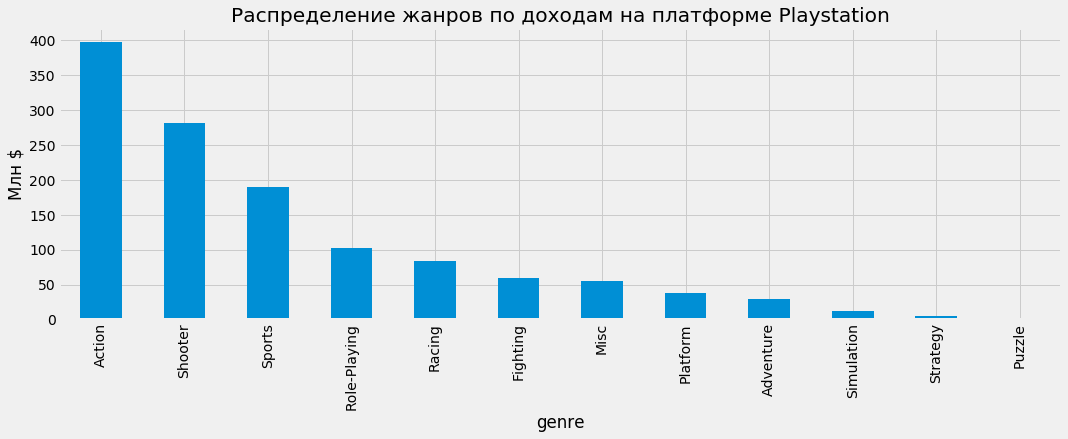

In [610]:
data[(data['max_year'] == 2016) & (data['platform'].isin(['PS3','PS4']))].pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False) \
    .plot(kind='bar',figsize=(16,5), legend=False);
plt.title('Распределение жанров по доходам на платформе Playstation');
plt.ylabel('Млн $');

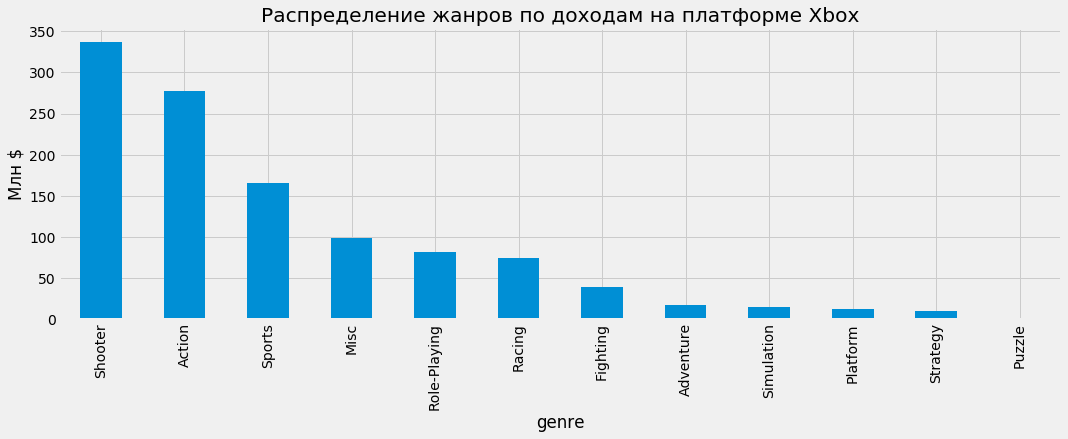

In [611]:
data[(data['max_year'] == 2016) & (data['platform'].isin(['X360','XOne']))].pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False) \
    .plot(kind='bar',figsize=(16,5), legend=False);
plt.title('Распределение жанров по доходам на платформе Xbox');
plt.ylabel('Млн $');

Тройка наиболее популярных жанровна платформах Playstation и Xbox одинаковые: Action, Shooter и Sports. При этом на Playstation наибольшей популярностью пользуются игры из жанра Action, в то время как на платформе Xbox - Shooter.

### Общий вывод
  - Наиболее доходным рынок компьютерных иг был на протяжении 2000-х годов, при этом начиная с 2012 года наблюдается сокращение выпускаемых игр и снижается средний доход на 1 игру
  - Средний срок жизни игровой платформы составляет 10 лет, при этом первые 4-5 лет наблюдается стабильный рост доходов, во второй половине жизненного цикла доходы постепенно сокращаются. Такая динамика обусловлена прежде всего сменой поколений игровых платформ с интервалом раз в 7 лет.
  - Наиболе актуальными игровыми платформами по состоянию на 2016 год являются PS4 и XOne. В ближайшие 2-3 года существенного спада продаж на них не должно произойти.
  - Средний доход на 1 игру на платформах Playstation и Xbox существенно выше среднерыночного значаения.
  - Чем выше оценка критиков и игроков, тем выше средний доход от одной игры, при этом данная зависомость начинает проявляться на высоких уровнях оценок (более 80 баллов для оценок критиков и более 9 баллов для оценок игроков)
  - Наибольший доход приносят жанры Action, Shooter и Sports
  

## Портрет пользователя <a class="anchor" id="third-bullet"></a>

In [612]:
data['na_count'] = (data['na_sales'] > 0) * 1
data['eu_count'] = (data['eu_sales'] > 0) * 1
data['jp_count'] = (data['jp_sales'] > 0) * 1

In [613]:
m1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='platform',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
m2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='platform',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
m3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='platform',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
m = m1.merge(m2, on='platform', how='outer',suffixes=('_na', '_eu')).merge(m3, on='platform', how='outer')
m.columns =['platform','count_na','count_eu','count_jp']

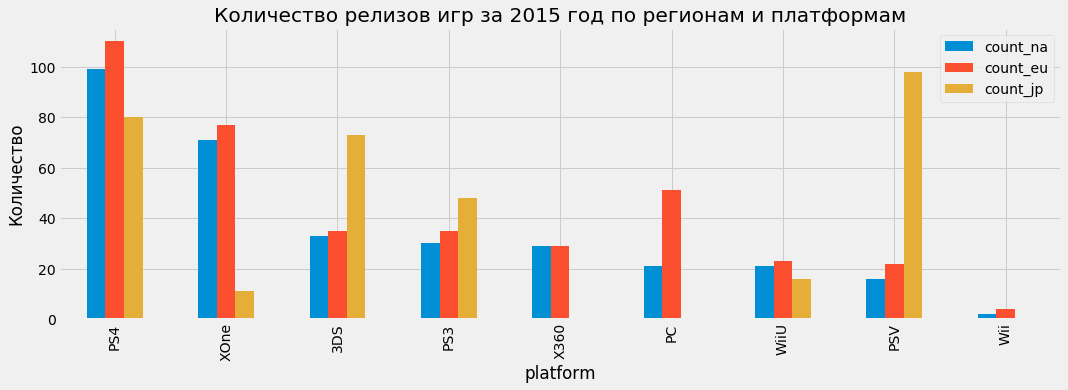

In [614]:
m.plot(kind='bar', x='platform', figsize=(16,5))
plt.title('Количество релизов игр за 2015 год по регионам и платформам')
plt.ylabel('Количество')
plt.show;

In [615]:
s1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='platform',values='na_sales',aggfunc='sum') \
        .sort_values('na_sales', ascending=False).reset_index()
s2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='platform',values='eu_sales',aggfunc='sum') \
        .reset_index()
s3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='platform',values='jp_sales',aggfunc='sum') \
        .reset_index()
s = s1.merge(s2, on='platform', how='outer',suffixes=('_na', '_eu')).merge(s3, on='platform', how='outer')
s.columns =['platform','sales_na','sales_eu','sales_jp']

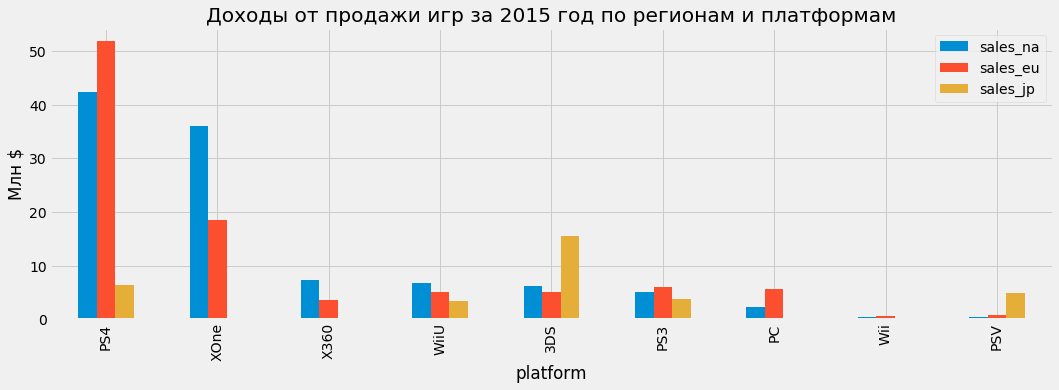

In [616]:
s.plot(kind='bar', x='platform', figsize=(16,5))
plt.title('Доходы от продажи игр за 2015 год по регионам и платформам')
plt.ylabel('Млн $')
plt.show;

Ситуация с продажами игр по игровым платформам в Северной Америке и Европе в целом схожа. Наиболее популярна платформа PS4, затем идет XOne. При этом в Европе не смотря на схожее количество релизов игр на платформе XOne доходы от них в два раза меньше чем в США. Также необходимо отметить, что в Европе выпускается достаточно много игр на PC (в два раза больше чем в США).
Рынок Японии существенно отличается от европейского и американского. Здесь основные релизы игр приходятся на портативные приставки 3DS, PSV и только на 3 месте по доходам от продаж находится лидер европейского и американского рынка PS4.

In [617]:
n1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='genre',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
n2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='genre',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
n3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='genre',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
n = n1.merge(n2, on='genre', how='outer',suffixes=('_na', '_eu')).merge(n3, on='genre', how='outer')
n.columns =['genre','count_na','count_eu','count_jp']

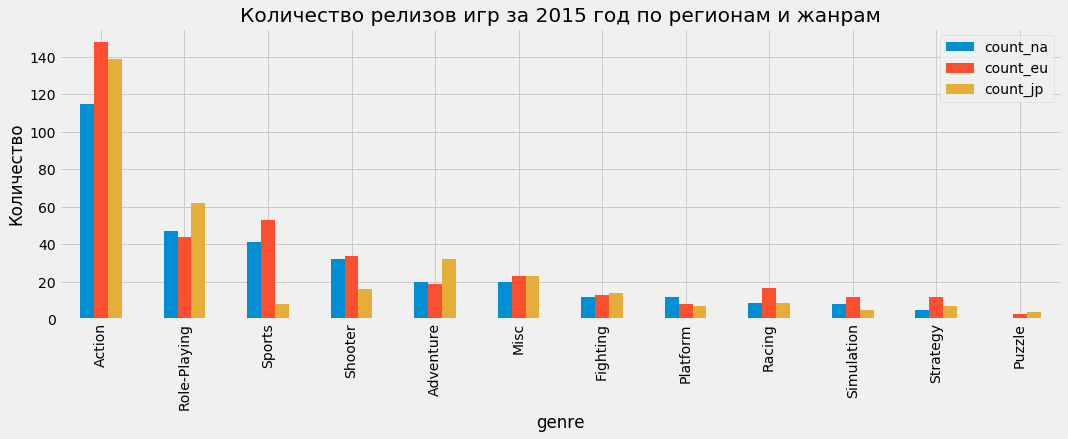

In [618]:
n.plot(kind='bar', x='genre', figsize=(16,5))
plt.title('Количество релизов игр за 2015 год по регионам и жанрам')
plt.ylabel('Количество')
plt.show;

In [619]:
t1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='genre',values='na_sales',aggfunc='sum') \
        .sort_values('na_sales', ascending=False).reset_index()
t2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='genre',values='eu_sales',aggfunc='sum') \
        .reset_index()
t3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='genre',values='jp_sales',aggfunc='sum') \
        .reset_index()
t = t1.merge(t2, on='genre', how='outer',suffixes=('_na', '_eu')).merge(t3, on='genre', how='outer')
t.columns =['genre','sales_na','sales_eu','sales_jp']

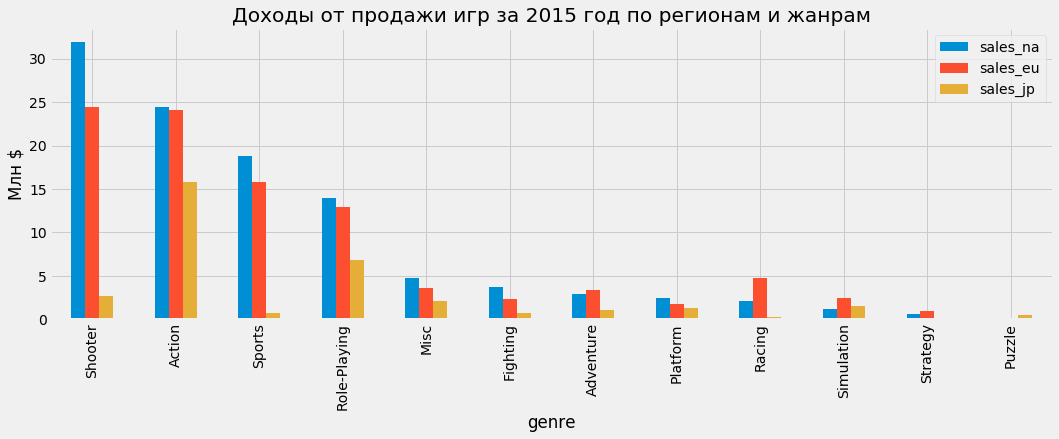

In [620]:
t.plot(kind='bar', x='genre', figsize=(16,5))
plt.title('Доходы от продажи игр за 2015 год по регионам и жанрам')
plt.ylabel('Млн $')
plt.show;

Как и по платформам в разрезе по жанрам рынки Северной Америки и Европы в целом схожи. Наиболее популярные жанры Shootter, Action, Sports. Отличия появляются только в пятой позиции рейтинга: в Европе большей популярностью пользуются игры жанра Racing, в США - Misc. Рынок Японии имеет ряд отличий. На втором месте по доходам находятся игры жанра Role-Playing, а на 5-м месте Simulation. В целом можно отметить, что в Японии пользуются популяностью жанры связанные с имитацией реальности, в то же время игры связанные со спортом, гонками и боями не популярны у игроков.

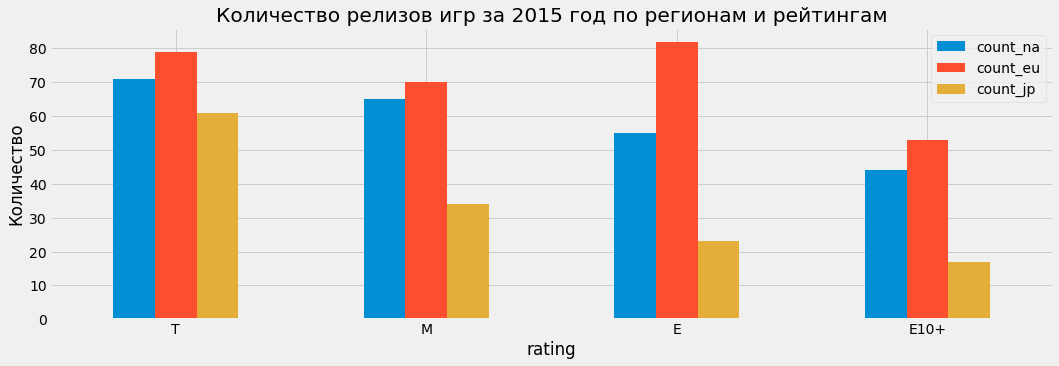

In [621]:
n1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='name',aggfunc='count') \
        .sort_values('name', ascending=False).reset_index()
n2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='name',aggfunc='count') \
        .reset_index()
n3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='name',aggfunc='count') \
        .reset_index()
n = n1.merge(n2, on='rating', how='outer',suffixes=('_na', '_eu')).merge(n3, on='rating', how='outer')
n.columns =['rating','count_na','count_eu','count_jp']
n.plot(kind='bar', x='rating', figsize=(16,5), rot=0)
plt.title('Количество релизов игр за 2015 год по регионам и рейтингам')
plt.ylabel('Количество')
plt.show;

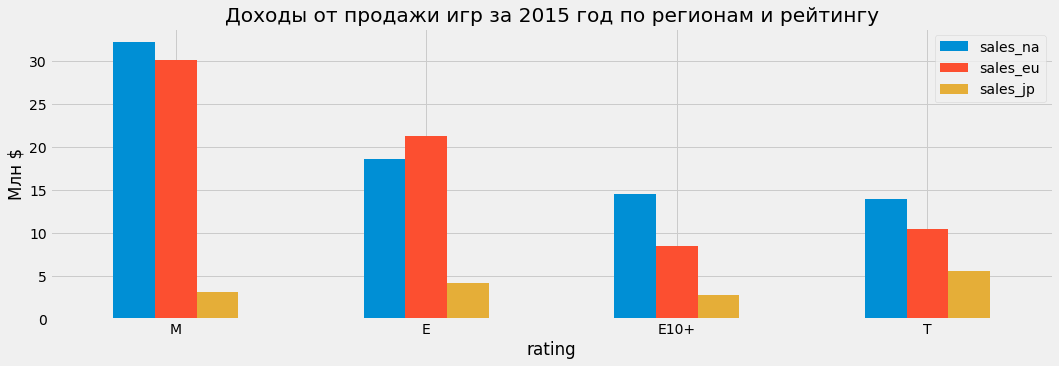

In [622]:
t1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='na_sales',aggfunc='sum') \
        .sort_values('na_sales', ascending=False).reset_index()
t2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='eu_sales',aggfunc='sum') \
        .reset_index()
t3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='jp_sales',aggfunc='sum') \
        .reset_index()
t = t1.merge(t2, on='rating', how='outer',suffixes=('_na', '_eu')).merge(t3, on='rating', how='outer')
t.columns =['rating','sales_na','sales_eu','sales_jp']
t.plot(kind='bar', x='rating', figsize=(16,5), rot=0)
plt.title('Доходы от продажи игр за 2015 год по регионам и рейтингу')
plt.ylabel('Млн $')
plt.show;

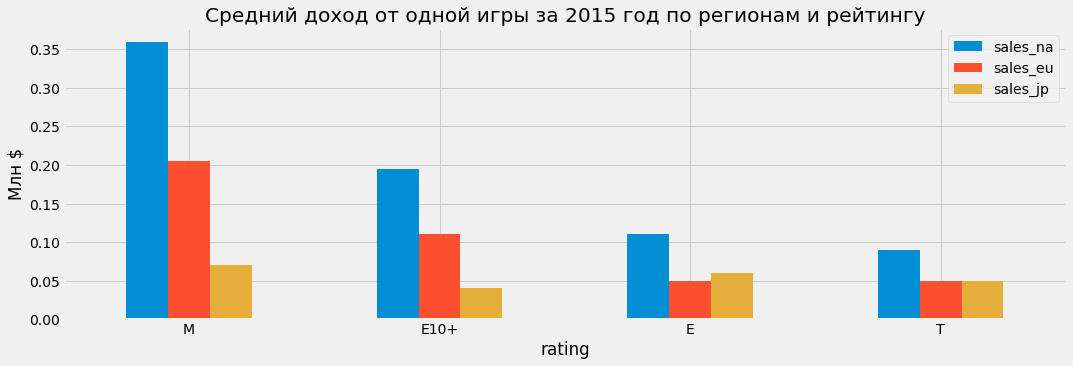

In [623]:
t1 = data[(data['max_year'] == 2016) & (data['na_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='na_sales',aggfunc='median') \
        .sort_values('na_sales', ascending=False).reset_index()
t2 = data[(data['max_year'] == 2016) & (data['eu_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='eu_sales',aggfunc='median') \
        .reset_index()
t3 = data[(data['max_year'] == 2016) & (data['jp_count'] > 0) & (data['year_of_release'] == 2015)].pivot_table(index='rating',values='jp_sales',aggfunc='median') \
        .reset_index()
t = t1.merge(t2, on='rating', how='outer',suffixes=('_na', '_eu')).merge(t3, on='rating', how='outer')
t.columns =['rating','sales_na','sales_eu','sales_jp']
t.plot(kind='bar', x='rating', figsize=(16,5), rot=0)
plt.title('Средний доход от одной игры за 2015 год по регионам и рейтингу')
plt.ylabel('Млн $')
plt.show;

Анализ по рейтингу ESRB показал, что не смотря на то, что больше всего релизов в штуках приходится на игры с рейтингом Т, больший доход приносят издателям игры с рейтингом М (средний доход от одной игры заметно выше чем у игр с другим рейтингом).
Есть отличия в продажах в зависимости от рейтинга в разрезе регионом, так например в Европе выходит больше игр с рейтингом E. При этом до хоходам в Европе и США лидируют игры с рейтингом М, в то время как в Японии с индексом T.

### Общий вывод
  - Рынки Европы и Северной Америки во много схожи, на них лидируют по популярности одни и теже платформы и жанры игр.
  - Рынок японии ориантирован в основном на портативные консоли (3DS, PSV), среди игр пользуются популярностью игры имитирующие реальность (ролевые игры, симуляторы).
  - Несмотря на то, что по количеству выходит больше игр с рейтингом Т (для Европы с рейтингом Е), основной доход издатаелям приносят игры с рейтингом M, поскольку средний доход на 1 релиз у этого жанра существенно выше.
  


## Проверка гипотез <a class="anchor" id="fourth-bullet"></a>

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы сопоставим средние значения двух совокупностей.  
Формируем нулевую гипотезу, что средние пользовательские рейтинги платформ XOne и PC не отличаются. Тогда альтернативной гипотезой будет утверждение, что средние рейтинги отличаются. Уровень статистической значимости зададим на уровне 5%. Гипотеза будет двухсторонняя, поскольку нам важно понять наличие различий между двумя выборками, т.е. отклонение может быть как в одну так и в другую сторону. Для оценки возьмем одинаковый временной период, чтобы исключить влияние изменения пользовательского рейтинга с течением времени. Поскольку XOne появилась в 2013 году будем анализировать период 2013-2016 гг.

Оценим дисперсию по двум выборкам

In [624]:
t1 = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013) & (data['user_score'].notna())]['user_score']
t2 = data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013) & (data['user_score'].notna())]['user_score']
print(t1.var())
print(t2.var())

1.9069968429360695
3.034367531446541


In [625]:
a = 0.05 # уровень статистической значимости
results = st.ttest_ind(t1, t2, equal_var = True)
# Используем equal_var = True из-за того, что дисперсии для двух анализируемых выборок отличаются несущественно

print('p-значение:', results.pvalue)

if (results.pvalue < a):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14899620365690028
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value высокое, гораздо выше уровня статистической значимости, следовательно отвергнуть нулевую гипотезу не удалось (средние пользовательские рейтинги платформ XOne и PC не отличаются).

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы сопоставим средние значения двух совокупностей.  
Формируем нулевую гипотезу, что средние пользовательские рейтинги игр жанров Action и Sports не отличаются. Тогда альтернативной гипотезой будет утверждение, что средние рейтинги отличаются. Уровень статистической значимости зададим на уровне 5%. Гипотеза будет двухсторонняя, поскольку нам важно понять наличие различий между двумя выборками, т.е. отклонение может быть как в одну так и в другую сторону. 

Оценим дисперсию по двум выборкам

In [626]:
t1 = data[(data['genre'] == 'Action') & (data['user_score'].notna())]['user_score']
t2 = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]['user_score']
print(t1.var())
print(t2.var())

2.031746898033205
2.5965147189730033


In [627]:
a = 0.05 # уровень статистической значимости
results = st.ttest_ind(t1, t2, equal_var = True)
# Используем equal_var = True из-за того, что дисперсии для двух анализируемых выборок отличаются несущественно

print('p-значение:', results.pvalue)

if (results.pvalue < a):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value высокое, в два раза выше уровня статистической значимости, следовательно отвергнуть нулевую гипотезу не удалось (средние пользовательские рейтинги игр жанров Action и Sports не отличаются).



## Общий вывод <a class="anchor" id="fifth-bullet"></a>

На перспективу ближайших 2-3 лет магазину целесообразно сконцентрироваться на рынке Северной америки и Европы в основном на жанрах Action, Shooter, Sports по следующим причинам:
  - средний срок жизни консолей 10 лет, при этом за первые 4-5 лет продажи игр на новых консолях выходят на максимальный уровень. Из актуальных платформ в начале жизненого цикла находятся только две платформы: PS4 и XOne (2016 год - 4 год с момента запуска платформы). В перспективе 2-3 лет продажи на этих платформах будут оставаться достаточно высокими.
  - на рынке Северной Америки и Европы самые популярные игровые платформы как раз PS4 и XOne. В Японии популярны портативные консоли (3DS и PSV), но данные платформы уже находятся в стадии спада своего жизненного цикла, в ближайшее время следует ожидать выхода нового поколения портативных консолей, при этом первые 2-3 года на новых консолях релизов новых игр будет выходить мало.
  - среди жанров игр в Северной Америке и Европе наибольшей популярностью пользуются Action, Shooter, Sports, Role-Playing. В Европе также по прежнему популярны игры для PC.
  - для максимизации прибыли стоит выбирать игры с высокими рейтингами критиков и пользователей (игры с рейтингами критиков выше 80, с рейтингами пользователей больше 9).
  - если исходить из рейтинга ESRB, то наибольший доход приносят игры с рейтингом M.